In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

### Step 1: Generate Data

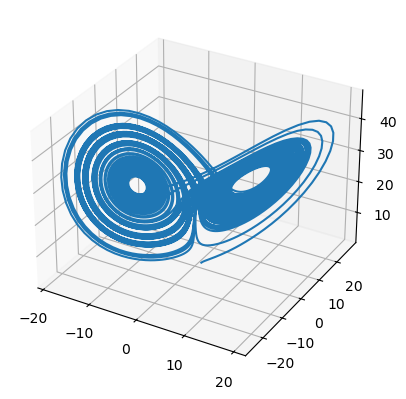

In [3]:
def lorenz(t, y, sigma=10, beta=8/3, rho=28):
    x, y, z = y
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
t_span = (0, 100)
y0 = [1.0, 1.0, 1.0]  # Initial condition
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Time points

# Solve the system
solution = solve_ivp(lorenz, t_span, y0, t_eval=t_eval)

# Extract data
data = solution.y.T
t = solution.t

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[:, 0], data[:, 1], data[:, 2])
plt.show()


Step 2: Prepare Data

In [4]:
# Prepare the data
X = data[:-1]
y = data[1:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)



### Step 3: Define the Neural Network

In [5]:
# Define the model
model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()



/Users/anthonymeza/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,931 (50.51 KB)

 Trainable params: 12,931 (50.51 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Train the Network


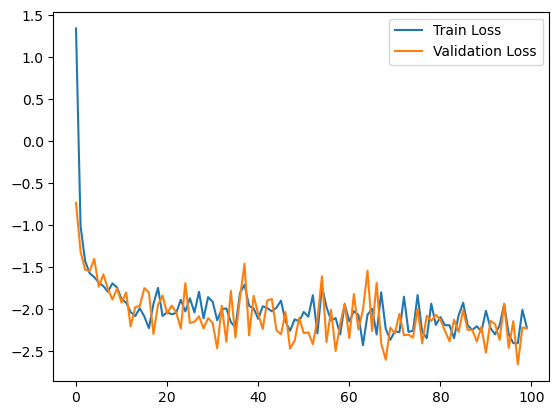

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Plot the training loss
plt.plot(np.log10(history.history['loss']), label='Train Loss')
plt.plot(np.log10(history.history['val_loss']), label='Validation Loss')
plt.legend()
plt.show()

### Step 5: Evaluate the Network


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
R-squared value for x: 0.9999555417188883
R-squared value for y: 0.9999199510738557
R-squared value for z: 0.999881894969677


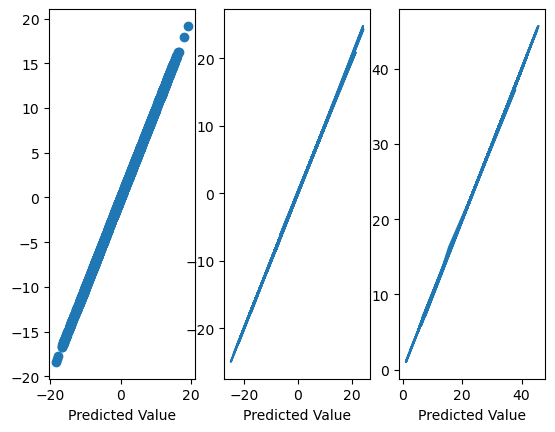

In [7]:
from sklearn.metrics import r2_score

# Predict the next steps
predictions = model.predict(X_test)

# Plot the true vs predicted data
fig, ax = plt.subplots(1,3)
ax[0].scatter(y_test[:, 0], predictions[:, 0])
ax[1].plot(y_test[:, 1], predictions[:, 1], label='Predicted')
ax[2].plot(y_test[:, 2], predictions[:, 2], label='Predicted')

[a.set_xlabel("True Value") for a in ax]
[a.set_xlabel("Predicted Value") for a in ax]

# Compute R-squared value
r2_x = r2_score(y_test[:, 0], predictions[:, 0])
r2_y = r2_score(y_test[:, 1], predictions[:, 1])
r2_z = r2_score(y_test[:, 2], predictions[:, 2])

print(f"R-squared value for x: {r2_x}")
print(f"R-squared value for y: {r2_y}")
print(f"R-squared value for z: {r2_z}")

# plt.legend()
# plt.show()

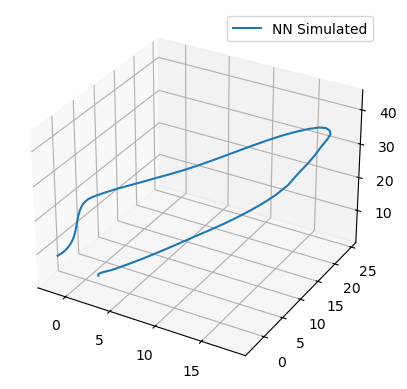

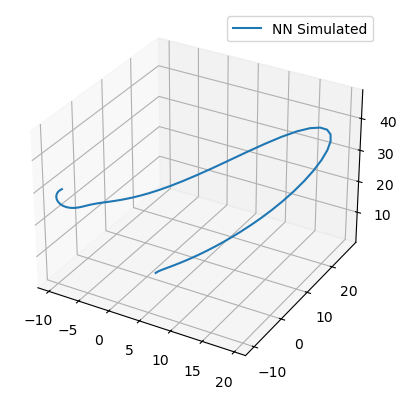

In [18]:
# Step 6: Use Neural Network to Simulate the Lorenz Equations
# Autonomous prediction

# Initialize the starting point
current_state = np.array(y0)

# Number of prediction steps
n_steps = 100

# Store the predicted states
predicted_states = np.zeros((n_steps, 3))
predicted_states[0] = current_state

# Predict iteratively
for i in range(1, n_steps):
    current_state = model.predict(current_state.reshape(1, -1), verbose = 0 )[0]
    predicted_states[i] = current_state

# Plot the simulated data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(predicted_states[:, 0], predicted_states[:, 1], predicted_states[:, 2], label='NN Simulated')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[:n_steps, 0], data[:n_steps, 1], data[:n_steps, 2], label='NN Simulated')
plt.legend()
plt.show()
